# Feature Selection using Chi-Square test - Experimentation

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats

import os
print(os.getcwd())

c:\Users\haris\Desktop\GitHub_Projects\Statistics


In [3]:
churn_master_df = pd.read_csv("RawData\churn_data_st.csv")
churn_df = churn_master_df.copy()
churn_df.head()

,customerID,gender,SeniorCitizen,tenure,ServiceCount,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,2,Month-to-month,Yes,29.85,29.85,No
1,5575-GNVDE,Male,0,34,4,One year,No,56.95,1889.50,No
2,3668-QPYBK,Male,0,2,4,Month-to-month,Yes,53.85,108.15,Yes
3,7795-CFOCW,Male,0,45,4,One year,No,42.30,1840.75,No
4,9237-HQITU,Female,0,2,2,Month-to-month,Yes,70.70,151.65,Yes


In [4]:
churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 10 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
tenure              7043 non-null int64
ServiceCount        7043 non-null int64
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7016 non-null float64
Churn               7043 non-null object
dtypes: float64(2), int64(3), object(5)
memory usage: 550.4+ KB


In [5]:
print("Rows :", churn_df.shape[0])
print("Columns :", churn_df.shape[1])
print("\nFeatures : \n", churn_df.columns.tolist())
print("\nUnique values : \n", churn_df.nunique())

Rows : 7043
Columns : 10

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'tenure', 'ServiceCount', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn']

Unique values : 
 customerID          7043
gender                 2
SeniorCitizen          2
tenure                73
ServiceCount           9
Contract               3
PaperlessBilling       2
MonthlyCharges      1585
TotalCharges        6514
Churn                  2
dtype: int64


## Hyothesis formualation
- Null Hypothesis: There is no relationship between two categorical values
- Alternate Hypothesis: There is a realtionship between the two categorical values

#### Key Questions to address
1. Is there any realtionship between users who have churned to Gender of the user?
2. Is there any realtionship between users who opted for paperless billing to user who have churned?


In [6]:
churn_df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

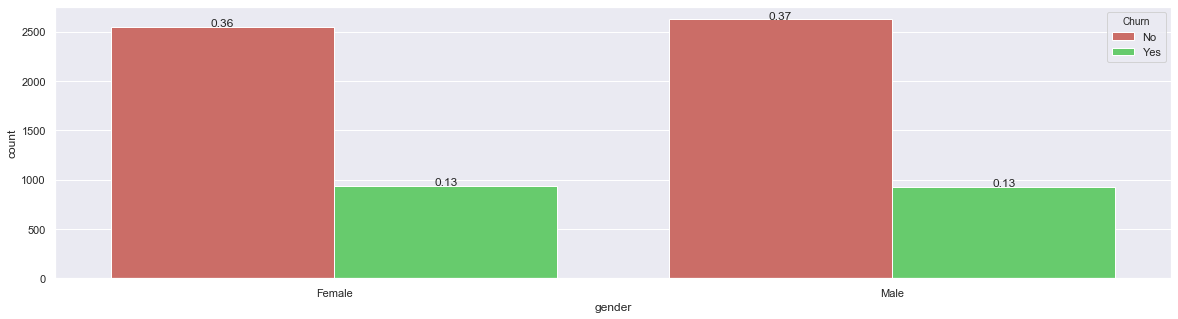

In [8]:
sns.set(style='darkgrid')
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="gender", hue="Churn", data=churn_df)


for p in ax.patches: 
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")


## All the test should be based on the relative likelihood

In [12]:
gender_churn_ct=pd.crosstab(index=churn_df['gender'], columns=churn_df['Churn'])
gender_churn_ct

Churn,No,Yes
gender,,
Female,2549,939
Male,2625,930


In [13]:
gender_churn_ct.iloc[1].values

array([2625,  930], dtype=int64)

In [16]:
(chi2, p, dof,_) = stats.chi2_contingency([gender_churn_ct.iloc[0].values, gender_churn_ct.iloc[1].values])

In [17]:
print("chi2 : ", chi2)
print("p-value : ", p)
print("Degree for Freedom : ", dof)

chi2 :  0.4840828822091383
p-value :  0.48657873605618596
Degree for Freedom :  1


Chi-squard statistics: X^2 = sum((Observed-Expected)^2/Expected)

- p-value is 0.48 as the alpha/critical value is <0.05.
- The null hypothesis is true because there is no statistical significance because the p-value is greater than 0.05
- We fail to reject the null hypothesis, to put this in context gender is not significant to churn
- As a result, this feature should not be kept

In [18]:
pd.crosstab(index=churn_df['gender'], columns=churn_df['Churn'], margins=True)

Churn,No,Yes,All
gender,,,
Female,2549,939,3488
Male,2625,930,3555
All,5174,1869,7043


In [19]:
churn_df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

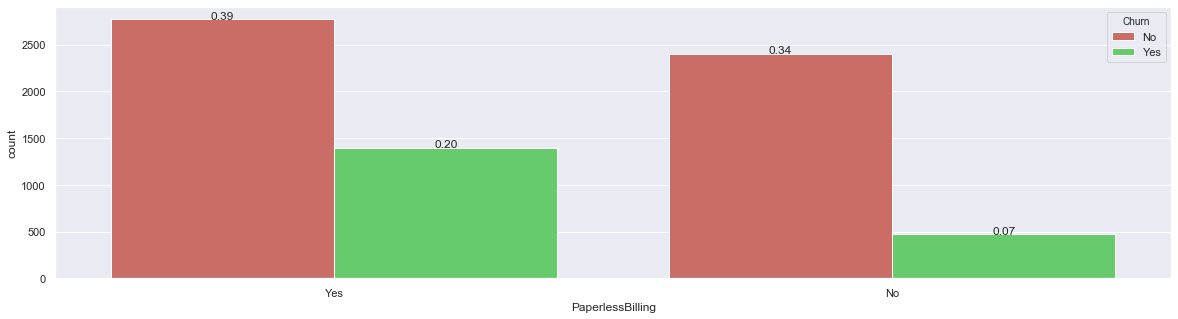

In [22]:
sns.set(style="darkgrid")
sns.set_palette("hls", 3)
fig, ax = plt.subplots(figsize=(20,5))
ax = sns.countplot(x="PaperlessBilling", hue="Churn", data=churn_df)


for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3, 
            '{:1.2f}'.format(height/churn_df.shape[0]),
            ha="center")

In [24]:
pd_churn_ct = pd.crosstab(index=churn_df['PaperlessBilling'], columns=churn_df['Churn'])
pd_churn_ct

Churn,No,Yes
PaperlessBilling,,
No,2403,469
Yes,2771,1400


In [25]:
pd_churn_ct.iloc[0].values

array([2403,  469], dtype=int64)

In [27]:
(chi2, p, dof,_) = stats.chi2_contingency([pd_churn_ct.iloc[0].values, pd_churn_ct.iloc[1].values]) 

In [28]:
print("chi2 :" ,chi2)
print("p-value :", p)
print("Degree for freedom :", dof)

chi2 : 258.27764906707307
p-value : 4.073354668665985e-58
Degree for freedom : 1


Chi-squard statistics: X^2 = sum((Observed-Expected)^2/Expected)

- p-value is 4.07e-58, as the alpha/critical value is <0.05.
- The null hypothesis is false because there is some statistical significance because the p-value is less than 0.05
- We reject the null hypothesis, to put this in context paper billing is a significant to churn (but this needs to be checked with domain experts)
- As a result, this feature should be kept